In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [2]:
# 导入数据
filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

In [3]:
# 将数据分为输入数据和输出结果
array = data.values
X = array[:, 0:8]
Y = array[:, 8]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['NB'] = GaussianNB()
results = []
for name in models:
    result = cross_val_score(models[name], X, Y, cv=kfold)
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (name, result.mean(), result.std())
    print(msg)

LR: 0.770 (0.048)
LDA: 0.773 (0.052)
KNN: 0.727 (0.062)
CART: 0.699 (0.058)
SVM: 0.651 (0.072)
NB: 0.755 (0.043)


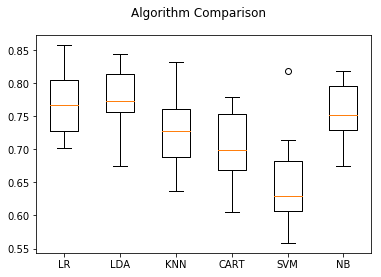

In [4]:
# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()